In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization

2022-11-10 22:15:26.017286: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-10 22:15:26.103818: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-10 22:15:26.103833: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-10 22:15:26.124385: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-10 22:15:26.585465: W tensorflow/stream_executor/platform/de

In [2]:
# Load data into a DataFrame
dataset = load_iris()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

# Append "target" and name it "label"
df['label'] = dataset.target

# Use string label instead
df['label'] = df.label.replace(dict(enumerate(dataset.target_names)))

In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# Transform label to one-hot encoding
label = pd.get_dummies(df['label'], prefix='label')
df = pd.concat([df, label], axis=1)

# Drop old label
df.drop(['label'], axis=1, inplace=True)

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label_setosa,label_versicolor,label_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [6]:
# Creating X and y

# Convert DataFrame into np array
X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
X = np.asarray(X)

# Convert DataFrame into np array
y = df[['label_setosa', 'label_versicolor', 'label_virginica']]
y = np.asarray(y)

In [7]:
# Split the data set in a training set (80%) and a test set (20%)
X_train, X_test, y_train, y_test = train_test_split(
  X,
  y,
  test_size=0.20,
  random_state=42
)

In [8]:
# Model with batch normalization
model = Sequential([
    Dense(64, input_shape=(4,), activation="relu"),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(3, activation='softmax')
]);

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                320       
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 batch_normalization_2 (Batc  (None, 128)              5

2022-11-10 22:15:27.571986: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-11-10 22:15:27.572027: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-10 22:15:27.572044: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (fabio-XPS-15-7590): /proc/driver/nvidia/version does not exist
2022-11-10 22:15:27.572259: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [10]:
history = model.fit(
    X_train, 
    y_train, 
    epochs=200, 
    validation_split=0.25, 
    batch_size=40, 
    verbose=2
)

Epoch 1/200
3/3 - 1s - loss: 1.5664 - accuracy: 0.3444 - val_loss: 1.0691 - val_accuracy: 0.4000 - 1s/epoch - 357ms/step
Epoch 2/200
3/3 - 0s - loss: 0.4659 - accuracy: 0.8556 - val_loss: 1.0580 - val_accuracy: 0.4000 - 25ms/epoch - 8ms/step
Epoch 3/200
3/3 - 0s - loss: 0.3161 - accuracy: 0.9111 - val_loss: 1.0376 - val_accuracy: 0.4000 - 25ms/epoch - 8ms/step
Epoch 4/200
3/3 - 0s - loss: 0.1781 - accuracy: 0.9556 - val_loss: 1.0160 - val_accuracy: 0.4000 - 24ms/epoch - 8ms/step
Epoch 5/200
3/3 - 0s - loss: 0.1136 - accuracy: 0.9556 - val_loss: 0.9917 - val_accuracy: 0.4000 - 24ms/epoch - 8ms/step
Epoch 6/200
3/3 - 0s - loss: 0.1779 - accuracy: 0.9333 - val_loss: 0.9687 - val_accuracy: 0.4000 - 26ms/epoch - 9ms/step
Epoch 7/200
3/3 - 0s - loss: 0.1438 - accuracy: 0.9556 - val_loss: 0.9472 - val_accuracy: 0.4000 - 24ms/epoch - 8ms/step
Epoch 8/200
3/3 - 0s - loss: 0.1062 - accuracy: 0.9556 - val_loss: 0.9317 - val_accuracy: 0.4000 - 28ms/epoch - 9ms/step
Epoch 9/200
3/3 - 0s - loss: 0.0

Epoch 69/200
3/3 - 0s - loss: 0.0430 - accuracy: 0.9889 - val_loss: 0.3359 - val_accuracy: 0.9000 - 22ms/epoch - 7ms/step
Epoch 70/200
3/3 - 0s - loss: 0.0657 - accuracy: 0.9778 - val_loss: 0.3451 - val_accuracy: 0.8667 - 22ms/epoch - 7ms/step
Epoch 71/200
3/3 - 0s - loss: 0.1167 - accuracy: 0.9556 - val_loss: 0.3558 - val_accuracy: 0.8333 - 23ms/epoch - 8ms/step
Epoch 72/200
3/3 - 0s - loss: 0.0294 - accuracy: 0.9778 - val_loss: 0.3901 - val_accuracy: 0.7667 - 23ms/epoch - 8ms/step
Epoch 73/200
3/3 - 0s - loss: 0.0495 - accuracy: 0.9889 - val_loss: 0.3900 - val_accuracy: 0.7667 - 23ms/epoch - 8ms/step
Epoch 74/200
3/3 - 0s - loss: 0.1118 - accuracy: 0.9778 - val_loss: 0.3226 - val_accuracy: 0.8333 - 22ms/epoch - 7ms/step
Epoch 75/200
3/3 - 0s - loss: 0.0491 - accuracy: 1.0000 - val_loss: 0.2453 - val_accuracy: 0.9000 - 29ms/epoch - 10ms/step
Epoch 76/200
3/3 - 0s - loss: 0.0621 - accuracy: 0.9778 - val_loss: 0.2033 - val_accuracy: 0.9333 - 23ms/epoch - 8ms/step
Epoch 77/200
3/3 - 0s -

Epoch 136/200
3/3 - 0s - loss: 0.0607 - accuracy: 0.9667 - val_loss: 0.2328 - val_accuracy: 0.9000 - 23ms/epoch - 8ms/step
Epoch 137/200
3/3 - 0s - loss: 0.0299 - accuracy: 0.9889 - val_loss: 0.1932 - val_accuracy: 0.9333 - 23ms/epoch - 8ms/step
Epoch 138/200
3/3 - 0s - loss: 0.0219 - accuracy: 1.0000 - val_loss: 0.1632 - val_accuracy: 0.9667 - 25ms/epoch - 8ms/step
Epoch 139/200
3/3 - 0s - loss: 0.0593 - accuracy: 0.9889 - val_loss: 0.1462 - val_accuracy: 0.9667 - 24ms/epoch - 8ms/step
Epoch 140/200
3/3 - 0s - loss: 0.0214 - accuracy: 0.9889 - val_loss: 0.1479 - val_accuracy: 0.9667 - 23ms/epoch - 8ms/step
Epoch 141/200
3/3 - 0s - loss: 0.0141 - accuracy: 1.0000 - val_loss: 0.1551 - val_accuracy: 0.9333 - 23ms/epoch - 8ms/step
Epoch 142/200
3/3 - 0s - loss: 0.0496 - accuracy: 0.9778 - val_loss: 0.1662 - val_accuracy: 0.9333 - 23ms/epoch - 8ms/step
Epoch 143/200
3/3 - 0s - loss: 0.0277 - accuracy: 0.9889 - val_loss: 0.1827 - val_accuracy: 0.9333 - 26ms/epoch - 9ms/step
Epoch 144/200
3/

In [11]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_' + metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation ' + metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_' + metric])
    plt.show()

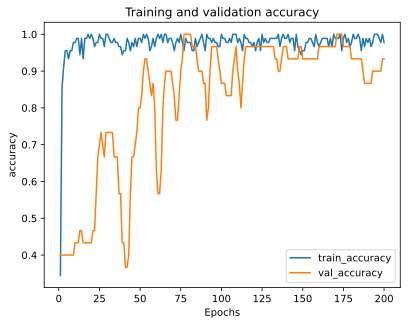

In [12]:
plot_metric(history, 'accuracy')

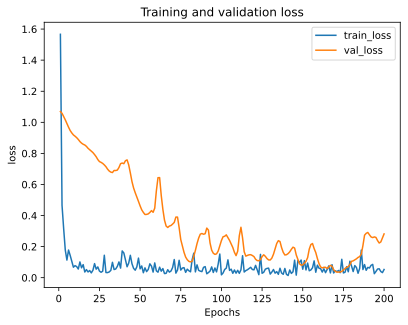

In [13]:
plot_metric(history, 'loss')

In [14]:
model.evaluate(X_test, y_test, verbose=2)

1/1 - 0s - loss: 0.1682 - accuracy: 0.9000 - 17ms/epoch - 17ms/step


[0.168246790766716, 0.8999999761581421]